In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)
from sklearn import metrics

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("employee_promotion.csv")

In [3]:
data.shape

(54808, 13)

In [4]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.000,8,0,49.000,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.000,4,0,60.000,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.000,7,0,50.000,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.000,10,0,50.000,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.000,2,0,73.000,0


In [5]:
data.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.000,17,0,78.000,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.000,6,0,56.000,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.000,3,0,79.000,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.000,2,0,nan,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.000,5,0,49.000,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


In [7]:
data.duplicated().sum()

0

In [8]:
round(data.isnull().sum() / data.isnull().count() * 100, 2)

employee_id            0.000
department             0.000
region                 0.000
education              4.400
gender                 0.000
recruitment_channel    0.000
no_of_trainings        0.000
age                    0.000
previous_year_rating   7.520
length_of_service      0.000
awards_won             0.000
avg_training_score     4.670
is_promoted            0.000
dtype: float64

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,54808.000,39195.831,22586.581,1.000,19669.750,39225.500,58730.500,78298.000
no_of_trainings,54808.000,1.253,0.609,1.000,1.000,1.000,1.000,10.000
age,54808.000,34.804,7.660,20.000,29.000,33.000,39.000,60.000
previous_year_rating,50684.000,3.329,1.260,1.000,3.000,3.000,4.000,5.000
length_of_service,54808.000,5.866,4.265,1.000,3.000,5.000,7.000,37.000
awards_won,54808.000,0.023,0.150,0.000,0.000,0.000,0.000,1.000
avg_training_score,52248.000,63.712,13.522,39.000,51.000,60.000,77.000,99.000
is_promoted,54808.000,0.085,0.279,0.000,0.000,0.000,0.000,1.000


# Observations
* Employee id is a unique value for each employee
* no_of_trainings is right skewed, with each employee on average partcipating in some form of training.
* age is pretty close to symetrical, with the mean at 34.8 and median at 33.
* previous_year_rating is a score from 1 to 5, and is right skewed with a mean of 3.3 and median of 3.
* length_of_service is right skewed with the mean at 5.8 years and median at 5 years.
* awards_won is the numerical count of how many awards an employee won during the previous year.  The max is 1, so this can effectively be a categorical column.  1 for received an wards and 0 for not having received an award.
* avg_training_score is right skewed with a mean of 63 and median of 60.
* is_promoted represents wether the employee is recommended for promotion, and is our target variable.

In [10]:
data.describe(include=["object"]).T

,count,unique,top,freq
department,54808,9,Sales & Marketing,16840
region,54808,34,region_2,12343
education,52399,3,Bachelor's,36669
gender,54808,2,m,38496
recruitment_channel,54808,3,other,30446


In [11]:
for i in data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in department are :
Sales & Marketing    16840
Operations           11348
Procurement           7138
Technology            7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64
**************************************************
Unique values in region are :
region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
reg

* Most of the people work in the Sales and Marketing departmnet, followed by Operationas, and then Technology
* Most of the employees are concetrated into just a few of the regions.
* Most of the employees are college educated, with most of those having only a bachelor's degree.
* The compan is over 2/3's Male
* Most employees were recruited by 'Other' means than souring or referal.

# Data Pre-processing

In [12]:
# This column is unique for each employee, so it is dropped.
data.drop(["employee_id"], axis=1, inplace=True)

# Eda

## Univariate Analysis

In [13]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

# Observations on Number of Trainings

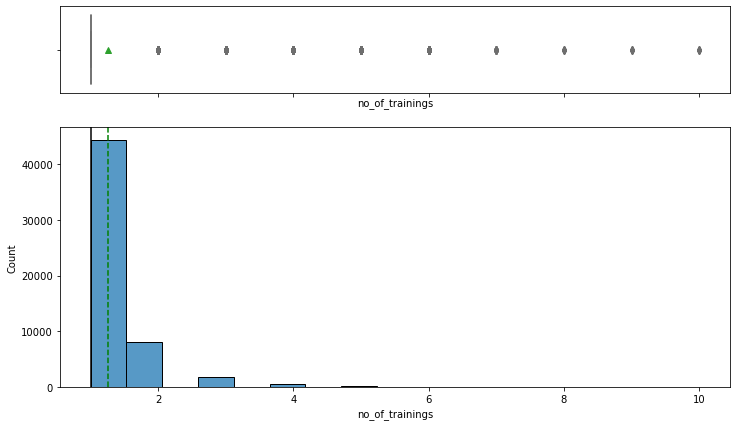

In [14]:
histogram_boxplot(data, "no_of_trainings")

So many people have had 1 training, that anything else is considered an outlier. However, since we would expect to see people who had more than 1 training in future data, I wont change it.

# Observations on Age

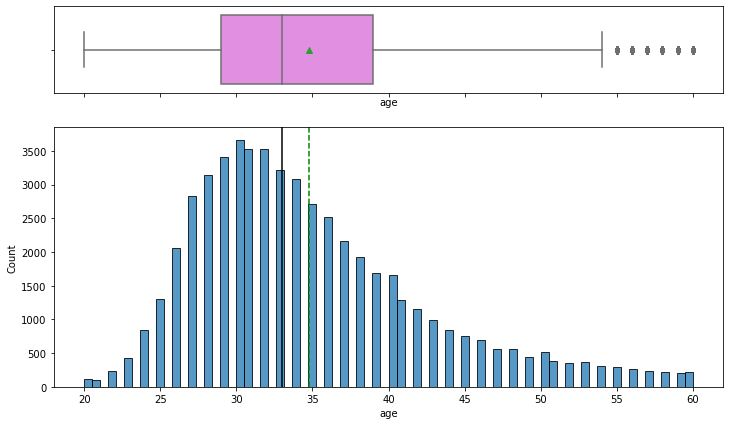

In [15]:
histogram_boxplot(data, "age")

The bulk of the workforce is between age 29 and 39, with some outliers on the right that bring up the average.

# Observations on Previous Year Rating

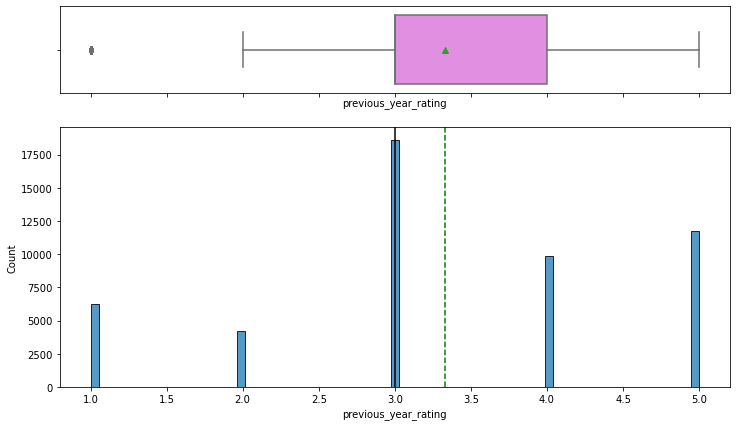

In [16]:
histogram_boxplot(data, "previous_year_rating")

Most employees were rated 3 out of 5, with the average slightly higher than that.  There are quite a few outliers on the left at 1 and 2.  

# Observations on Length of Service

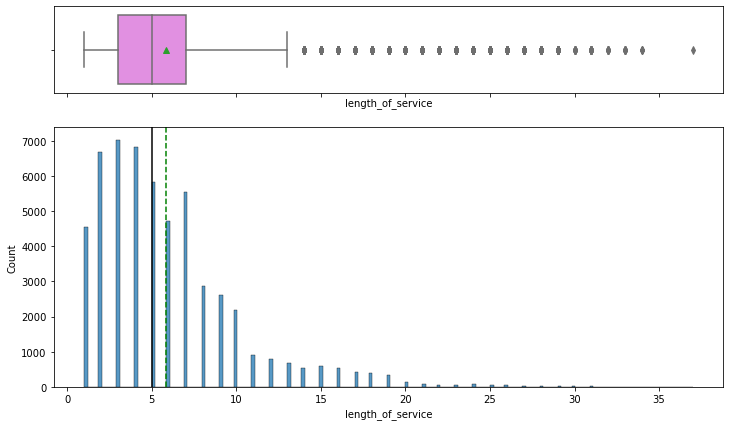

In [17]:
histogram_boxplot(data, "length_of_service")

The average employee has been with the company for 5 years, with the average being closer to 6.  There are quite a few outliers on the high end, which you would expect to see at a company.

# Awards Won

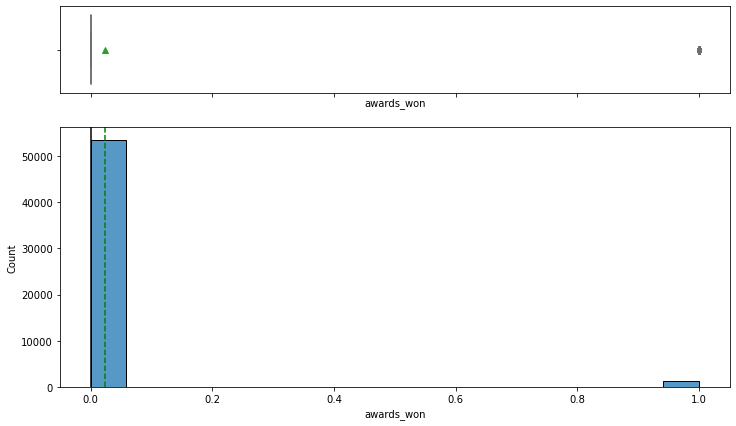

In [18]:
histogram_boxplot(data, "awards_won")

Since there are only two options for this, it can be turned into a categorical variable. Most employees do not receive awards.

# Average Training Score

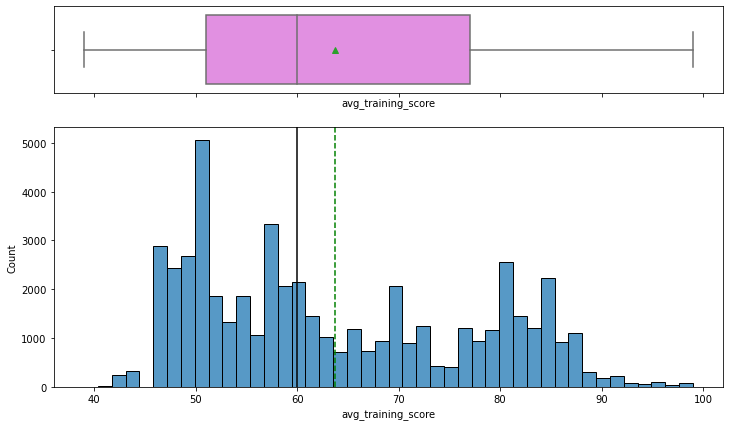

In [19]:
histogram_boxplot(data, "avg_training_score")

The average training score is around 60, and there are no outliers.

In [20]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

# Observations on Department

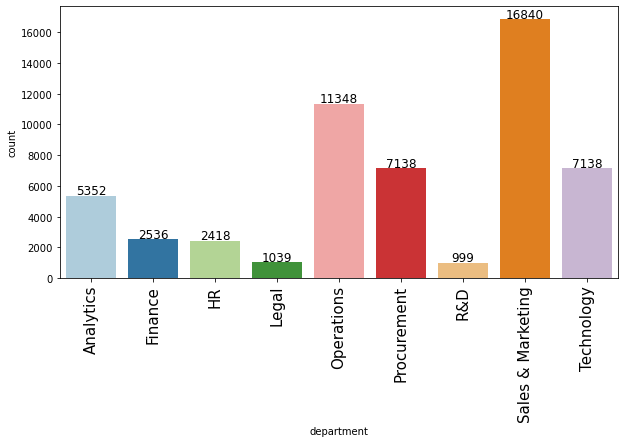

In [21]:
labeled_barplot(data, "department")

Most people work in the Sales and Marketing department, followed by Operations , and Technology tied with Procurement.  The lowest populated department is R&D followed by Legal

# Observations on Region

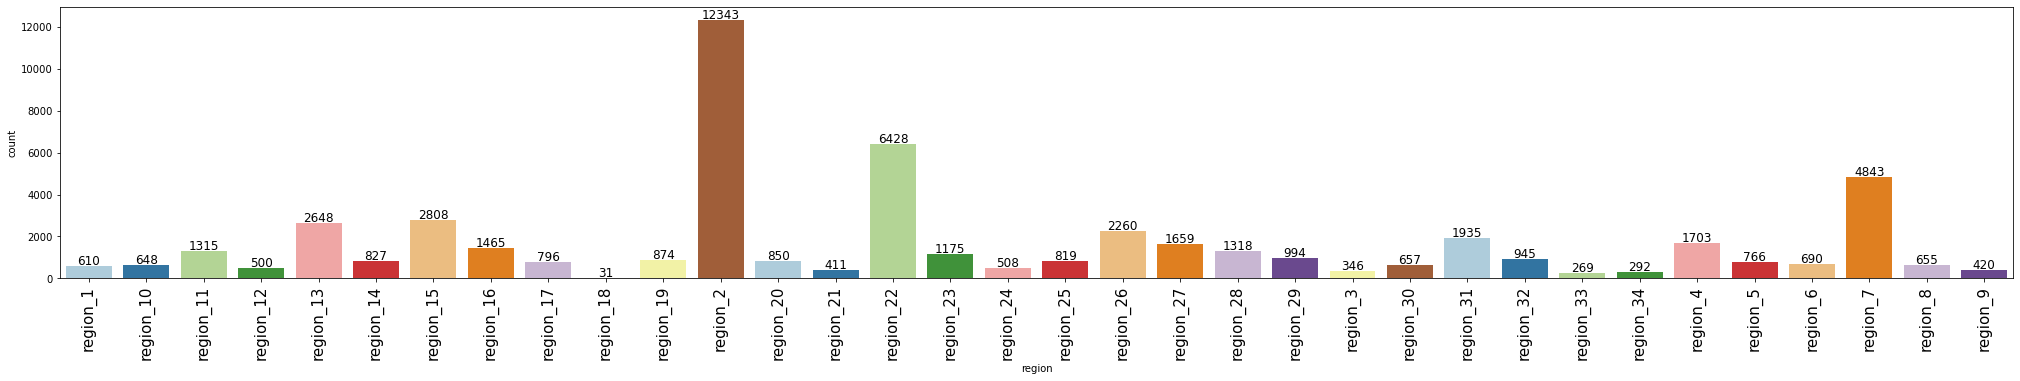

In [22]:
labeled_barplot(data, "region")

Most people live in region 2.  Im not sure what area this encompases.

# Observations on Education

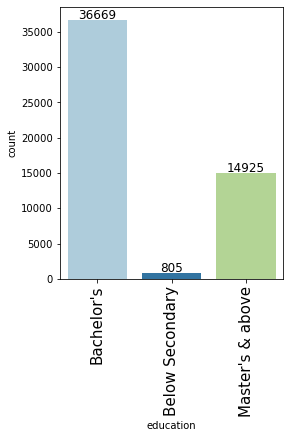

In [23]:
labeled_barplot(data, "education")

Most people are college educated, with some lacking a high school education.  There are some null values as well in this column, which could mean that they were never entered, or that they have a high school level education.

# Observations on Gender

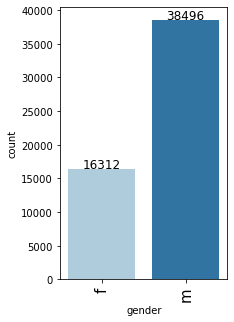

In [24]:
labeled_barplot(data, "gender")

Most employees are Male

# Observations on Recruitment Channel

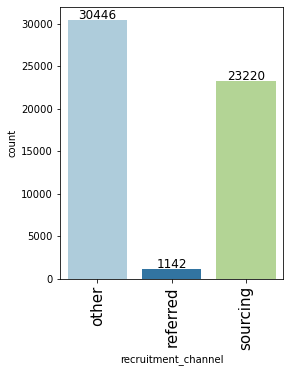

In [25]:
labeled_barplot(data, "recruitment_channel")

Most employees were hired through means other than sourcing or referals.

# Bivariate Analysis

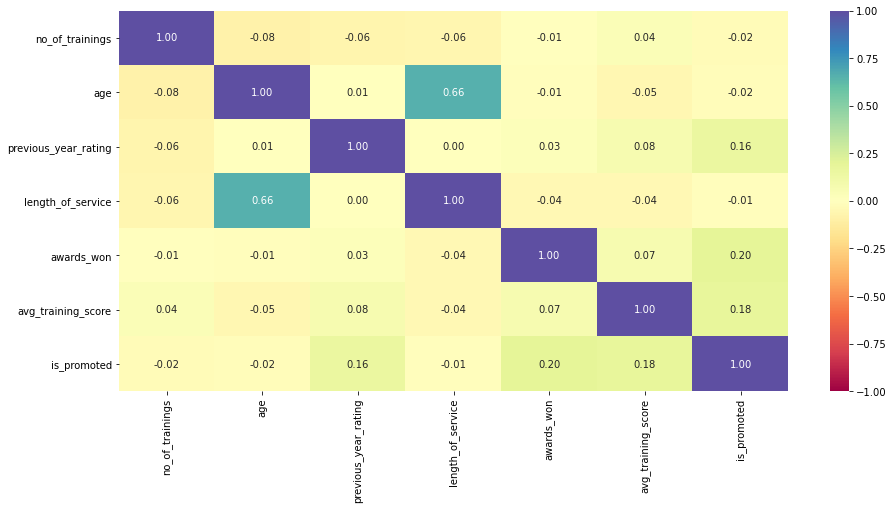

In [26]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* Length of Service and Age are highly correlated.  I will drop the length of service column to eliminate the codependency, since it has more outliers.
* Our target variable is_promoted has a slight correlation to awards won, average trainign score, and previous year rating.  This makes sense if the company attempts to promote its highest performers.

In [27]:
data = data.drop(["length_of_service"], axis=1)

In [28]:
data.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,awards_won,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.000,0,49.000,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.000,0,60.000,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.000,0,50.000,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.000,0,50.000,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.000,0,73.000,0


In [29]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

# Department vs region

region             region_1  region_10  region_11  region_12  region_13  \
department                                                                
All                     610        648       1315        500       2648   
Sales & Marketing       367        235        414        178        923   
Operations               61         87        281        153        540   
Analytics                76         26        128         37        133   
Finance                   7         13         57         10         87   
HR                        7         15         41          9         83   
Legal                     1          0         22         12         32   
Procurement              18        152        174         62        425   
R&D                       0          2         47          2         26   
Technology               73        118        151         37        399   

region             region_14  region_15  region_16  region_17  region_18  \
department             

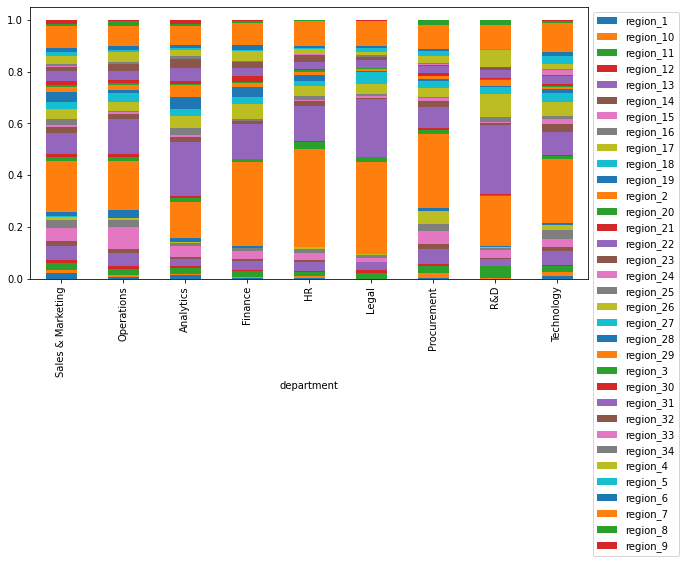

In [30]:
stacked_barplot(data, "department", "region")

# Department vs Education

education          Bachelor's  Below Secondary  Master's & above    All
department                                                             
All                     36669              805             14925  52399
Technology               4642              201              2196   7039
Operations               7781              176              3165  11122
Procurement              4393              129              2544   7066
HR                       1525              128               733   2386
Finance                  1895              106               499   2500
Legal                     814               65               156   1035
Analytics                3978                0              1037   5015
R&D                       542                0               429    971
Sales & Marketing       11099                0              4166  15265
------------------------------------------------------------------------------------------------------------------------


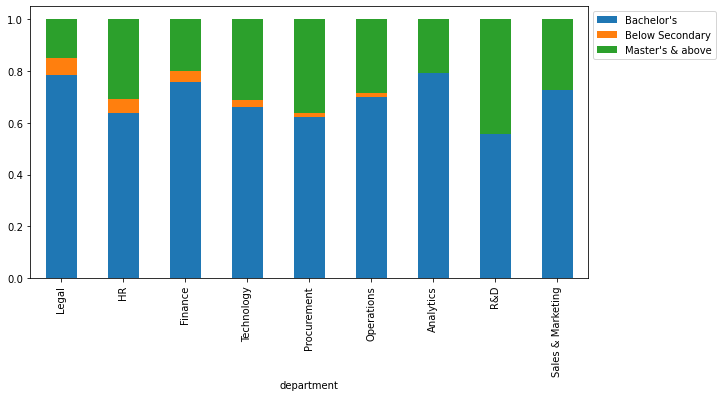

In [31]:
stacked_barplot(data, "department", "education")

All departments are mostly made up of people with bachelors degrees, but R&D has the least amount of people without Masters degrees.  R&D, Sales, and Analytics dont have any people with people who have less than a secondary education.

# Department vs Gender

gender                 f      m    All
department                            
All                16312  38496  54808
Operations          4677   6671  11348
Procurement         3287   3851   7138
Sales & Marketing   3154  13686  16840
Technology          2788   4350   7138
HR                  1006   1412   2418
Finance              681   1855   2536
Analytics            513   4839   5352
Legal                149    890   1039
R&D                   57    942    999
------------------------------------------------------------------------------------------------------------------------


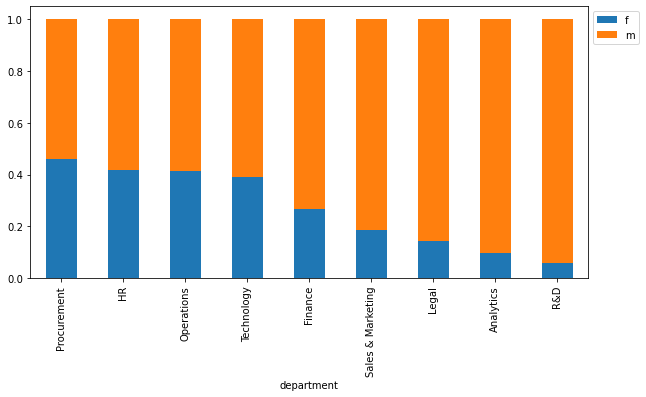

In [32]:
stacked_barplot(data, "department", "gender")

Each department has more men than women.  R&D has the highest M/F ration, while Procurement has the most even ratio. HR, Operations, and Technology also have more even ratios of men to women.

# Education vs Gender

gender                f      m    All
education                            
All               15921  36478  52399
Bachelor's        10854  25815  36669
Master's & above   4778  10147  14925
Below Secondary     289    516    805
------------------------------------------------------------------------------------------------------------------------


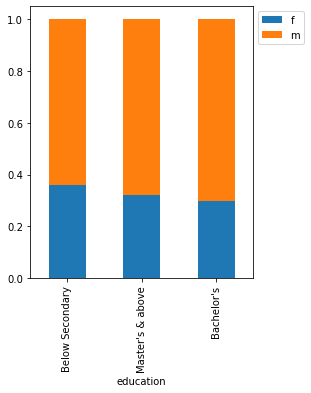

In [33]:
stacked_barplot(data, "education", "gender")

In [34]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

# Promotion vs Previous Year Rating

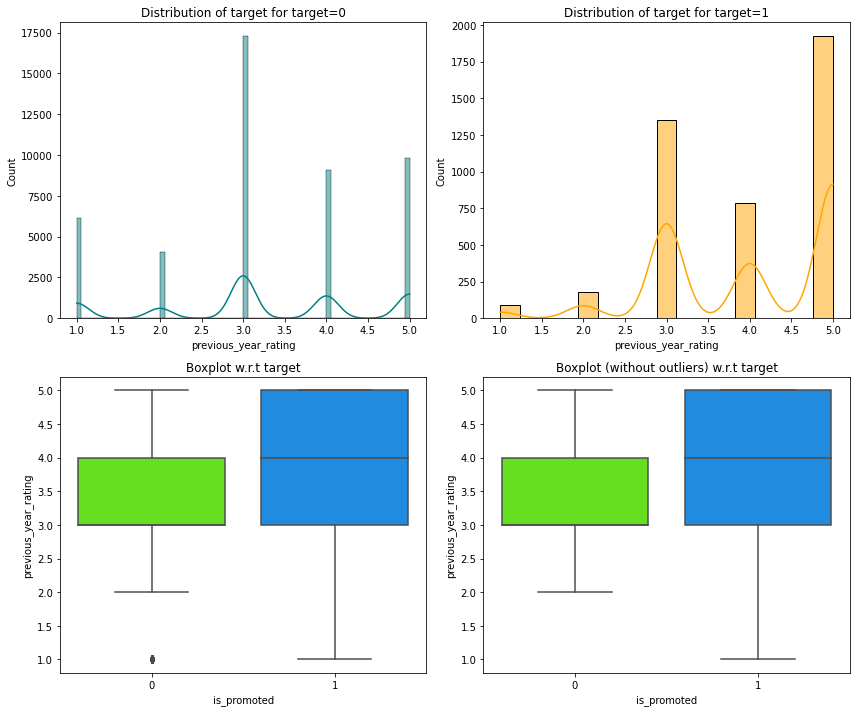

In [35]:
distribution_plot_wrt_target(data, "previous_year_rating", "is_promoted")

For the group of people who were promoted, there are more people getting promoted if they have a higher rating.  There are more promotions for a score of 3 than 4, but there are also significantly mroe people with a 3. But as a percent of the score group, more people with a 4 got promoted over those that were a 3.

# Promotion vs Awards Won

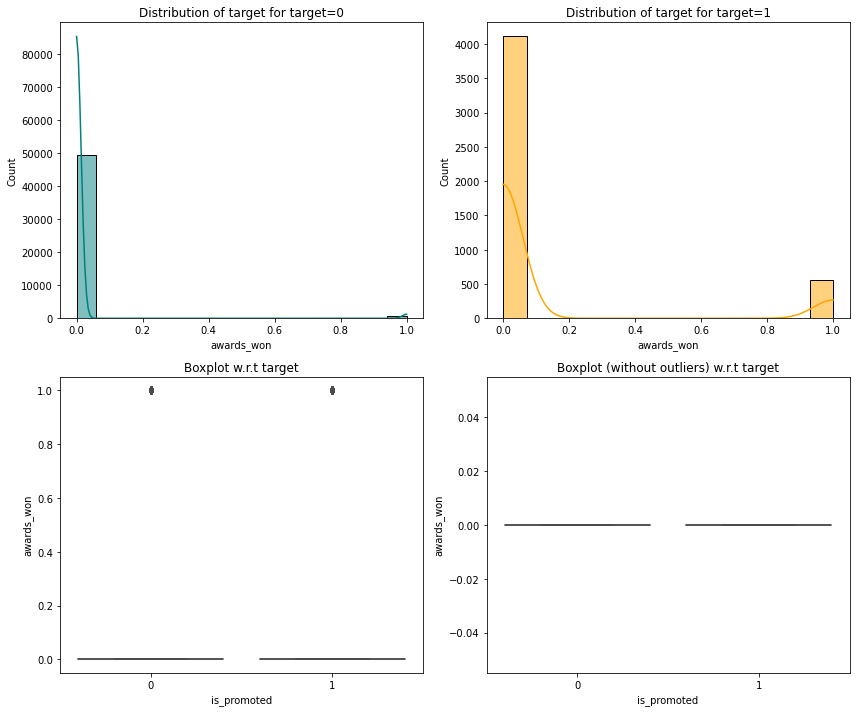

In [36]:
distribution_plot_wrt_target(data, "awards_won", "is_promoted")

More people who didnt recevie awards were promoted than people who did win awards, but there are far fewer people who won awards.  As a ratio, people who recevied awards and were promoted, vs people who received awards and were not promoted is far larger than the equivilant in the did not receive award group.

# Promotion vs Average Training Score

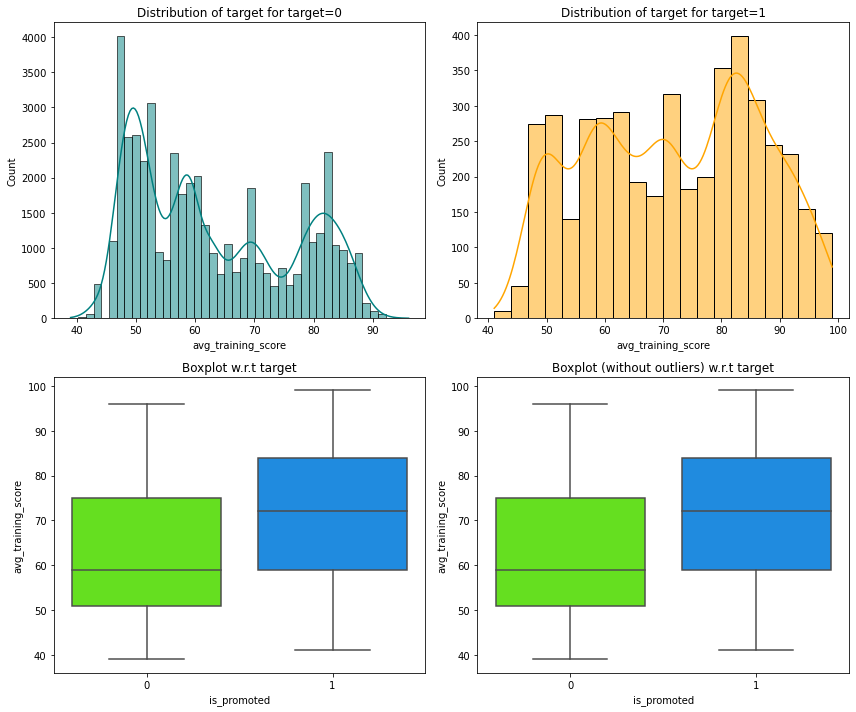

In [37]:
distribution_plot_wrt_target(data, "avg_training_score", "is_promoted")

People who were promoted had higher scores in training than people who were not promoted

# Outliers

In [38]:
Q1 = data.quantile(0.25)  # To find the 25th percentile and 75th percentile.
Q3 = data.quantile(0.75)

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

lower = (
    Q1 - 1.5 * IQR
)  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR

In [39]:
(
    (data.select_dtypes(include=["float64", "int64"]) < lower)
    | (data.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(data) * 100

no_of_trainings        19.030
age                     2.618
previous_year_rating   11.354
awards_won              2.317
avg_training_score      0.000
is_promoted             8.517
dtype: float64

I am choosing not to treat the outliers, since this is data that i would expect to see in a real case scenario.

# Missing Values

In [40]:
data.isna().sum()

department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64

In [41]:
df = data.copy()

In [42]:
imputer = SimpleImputer(strategy="most_frequent")

In [43]:
X = df.drop(["is_promoted"], axis=1)
y = df["is_promoted"]

In [44]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(32884, 10) (10962, 10) (10962, 10)


In [45]:
reqd_col_for_impute = ["education", "previous_year_rating", "avg_training_score"]

In [46]:
# Fit and transform the train data
X_train[reqd_col_for_impute] = imputer.fit_transform(X_train[reqd_col_for_impute])

# Transform the validation data
X_val[reqd_col_for_impute] = imputer.fit_transform(X_val[reqd_col_for_impute])

# Transform the test data
X_test[reqd_col_for_impute] = imputer.transform(X_test[reqd_col_for_impute])

All missing values have been treated

In [47]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
awards_won              0
avg_training_score      0
dtype: int64
------------------------------
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
awards_won              0
avg_training_score      0
dtype: int64
------------------------------
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
awards_won              0
avg_training_score      0
dtype: int64


# Create Dummy Columns

In [48]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(32884, 51) (10962, 51) (10962, 51)


After creating dummy columns there are 52 features

## Building the model

## Model evaluation criterion

### Model can make wrong predictions as:
1. Predicting an emplyee will be promoted, but isn't (False Positive)
2. Predicting an employee will not be promoted, but is (False Negative)

### Which case is more important? 
* Predicting that the employee deserves to be promoted is very important, so we want to minimize false positives.

### How to reduce this loss i.e need to reduce False Positives?
* We want to maximize our precision to minimize out false positives.

In [49]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)
    recall = recall_score(target, pred)
    precision = precision_score(target, pred)
    f1 = f1_score(target, pred)

    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [50]:
def confusion_matrix_sklearn(model, predictors, target):
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [51]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    scoring = "precision"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = precision_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Logistic regression: 79.6439414754381
Bagging: 63.38357568638416
Random forest: 72.89215092468065
GBM: 93.27318436446849
Adaboost: 83.95929989478377
Xgboost: 89.8316850946679
dtree: 34.744827080426795

Validation Performance:

Logistic regression: 0.8128654970760234
Bagging: 0.6447105788423154
Random forest: 0.7335092348284961
GBM: 0.9275862068965517
Adaboost: 0.8
Xgboost: 0.9130434782608695
dtree: 0.3597989949748744


# Pretuned Performance Comparison 

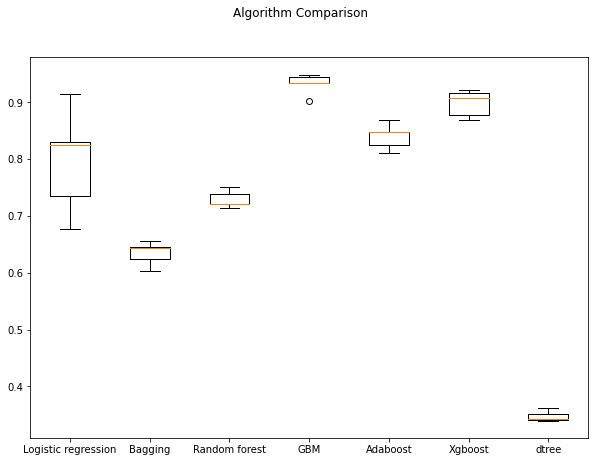

In [52]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

GBM outperforms all the other algoriths, but is closely followed by XGBoost, however GBM has one outlier in the low end, while XGBoost has none.  The outlier is still within the IQR of XGBoost.

# Hyperparameter Tuning

# GBM

In [53]:
%%time 

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.precision_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.5, 'n_estimators': 125, 'max_features': 1, 'learning_rate': 0.05, 'init': AdaBoostClassifier(random_state=1)} with CV score=1.0:
Wall time: 3min 19s


In [54]:
tuned_gbm1 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.5,
    n_estimators=125,
    max_features=1,
    learning_rate=0.05,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm1.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.05, max_features=1, n_estimators=125,
                           random_state=1, subsample=0.5)

In [55]:
# Checking model's performance on training set
gbm_train1 = model_performance_classification_sklearn(tuned_gbm1, X_train, y_train)
gbm_train1

,Accuracy,Recall,Precision,F1
0,0.917,0.026,1.000,0.051


In [56]:
# Checking model's performance on validation set
gbm_val1 = model_performance_classification_sklearn(tuned_gbm1, X_val, y_val)
gbm_val1

,Accuracy,Recall,Precision,F1
0,0.917,0.030,1.000,0.058


Gradient Boosting has high accuracy, and precision is 100% on both training and validation sets.

# Tuning XGBoost

In [57]:
%%time 

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,300,50),'scale_pos_weight':[0,1,2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05], 'gamma':[0,1,3,5],
            'subsample':[0.7,0.8,0.9,1]
           }
from sklearn import metrics

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.precision_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 1, 'scale_pos_weight': 1, 'n_estimators': 200, 'learning_rate': 0.1, 'gamma': 5} with CV score=0.9586793535011309:
Wall time: 7min 17s


In [58]:
tuned_xgb1 = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.9,
    scale_pos_weight=1,
    n_estimators=200,
    learning_rate=0.1,
    gamma=5,
)
tuned_xgb1.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=5, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [59]:
# Checking model's performance on training set
xgb_train1 = model_performance_classification_sklearn(tuned_xgb1, X_train, y_train)
xgb_train1

,Accuracy,Recall,Precision,F1
0,0.942,0.333,0.962,0.495


In [60]:
# Checking model's performance on validation set
xgb_val1 = model_performance_classification_sklearn(tuned_xgb1, X_val, y_val)
xgb_val1

,Accuracy,Recall,Precision,F1
0,0.941,0.317,0.958,0.476


Precision is slightly lower than XGBoost, but accuracy is higher overall, and recall is significantly higher.

# Tuning Random Forest

In [61]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.18,1:0.82},random_state=1,oob_score=True,bootstrap=True)

parameters = {  
                'max_depth': list(np.arange(5,15,5)) + [None],
                'max_features': ['sqrt','log2',None],
                'min_samples_leaf': np.arange(1,15,5),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': np.arange(10,110,10)}


# Run the grid search
randomized_cv = RandomizedSearchCV(rf_tuned, parameters, scoring='precision',cv=5,n_jobs=-1)
randomized_cv = randomized_cv.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = randomized_cv.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.18, 1: 0.82}, max_depth=5,
                       max_features='log2', min_samples_split=17,
                       n_estimators=50, oob_score=True, random_state=1)

In [62]:
tuned_rf1 = RandomForestClassifier(
    class_weight={0: 0.18, 1: 0.82}, max_features='sqrt',
                       n_estimators=80, oob_score=True, random_state=1
)
tuned_rf1.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.18, 1: 0.82}, max_features='sqrt',
                       n_estimators=80, oob_score=True, random_state=1)

In [63]:
# Checking model's performance on training set
rf_train1 = model_performance_classification_sklearn(tuned_rf1, X_train, y_train)
rf_train1

,Accuracy,Recall,Precision,F1
0,0.996,0.992,0.967,0.979


In [64]:
# Checking model's performance on training set
rf_val1 = model_performance_classification_sklearn(tuned_rf1, X_val, y_val)
rf_val1

,Accuracy,Recall,Precision,F1
0,0.930,0.285,0.719,0.408


After tuning, there is still an amount of overfitting, and precision and recall are both lower than that of the other two models.

## Oversample the train data


In [113]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 3268
Before Oversampling, counts of label 'No': 35097 



ValueError: could not convert string to float: 'Operations'

## Fitting the tuned models on oversampled data

# GBM

In [66]:
tuned_gbm2 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.5,
    n_estimators=125,
    max_features=1,
    learning_rate=0.05,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm2.fit(X_train_over, y_train_over)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.05, max_features=1, n_estimators=125,
                           random_state=1, subsample=0.5)

In [67]:
# Checking model's performance on training set
gbm_train2 = model_performance_classification_sklearn(
    tuned_gbm2, X_train_over, y_train_over
)
gbm_train2

,Accuracy,Recall,Precision,F1
0,0.858,0.866,0.852,0.859


In [68]:
# Checking model's performance on validation set
gbm_val2 = model_performance_classification_sklearn(
    tuned_gbm2, X_train, y_train
)
gbm_val2

,Accuracy,Recall,Precision,F1
0,0.812,0.403,0.200,0.268


Overall accuracy is down, as is precision.  But Recall is way up, and it is much more balanced in terms of Recall and Precision. Overfitting is way up.

# XGBoost

In [69]:
tuned_xgb2 = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.9,
    scale_pos_weight=1,
    n_estimators=200,
    learning_rate=0.1,
    gamma=5,
)
tuned_xgb2.fit(X_train_over, y_train_over)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=5, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [70]:
# Checking model's performance on training set
xgb_train2 = model_performance_classification_sklearn(tuned_xgb2, X_train_over, y_train_over)
xgb_train2

,Accuracy,Recall,Precision,F1
0,0.935,0.908,0.960,0.933


In [71]:
# Checking model's performance on validation set
xgb_val2 = model_performance_classification_sklearn(tuned_xgb2, X_train, y_train)
xgb_val2

,Accuracy,Recall,Precision,F1
0,0.915,0.410,0.502,0.451


Recall is higher, but other stats are down on validation

# Random Forest

In [72]:
tuned_rf2 = RandomForestClassifier(
    class_weight={0: 0.18, 1: 0.82}, max_features='sqrt',
                       n_estimators=80, oob_score=True, random_state=1
)
tuned_rf2.fit(X_train_over, y_train_over)

RandomForestClassifier(class_weight={0: 0.18, 1: 0.82}, max_features='sqrt',
                       n_estimators=80, oob_score=True, random_state=1)

In [73]:
# Checking model's performance on training set
rf_train2 = model_performance_classification_sklearn(tuned_rf2, X_train_over, y_train_over)
rf_train2

,Accuracy,Recall,Precision,F1
0,0.997,1.000,0.995,0.997


In [74]:
# Checking model's performance on training set
rf_val2 = model_performance_classification_sklearn(tuned_rf2, X_train, y_train)
rf_val2

,Accuracy,Recall,Precision,F1
0,0.995,0.996,0.952,0.973


All stats are significantly higher when using oversampling, with minimal overfitting on validation data.

# Undersampling

In [111]:
rus = RandomUnderSampler(random_state=1)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

In [77]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_under == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_under == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_under.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_under.shape))

Before Under Sampling, counts of label 'Yes': 2800
Before Under Sampling, counts of label 'No': 30084 

After Under Sampling, counts of label 'Yes': 2800
After Under Sampling, counts of label 'No': 2800 

After Under Sampling, the shape of train_X: (5600, 51)
After Under Sampling, the shape of train_y: (5600,) 



# GBM

In [78]:
tuned_gbm3 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.5,
    n_estimators=125,
    max_features=1,
    learning_rate=0.05,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm3.fit(X_train_under, y_train_under)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.05, max_features=1, n_estimators=125,
                           random_state=1, subsample=0.5)

In [79]:
# Checking model's performance on training set
gbm_train3 = model_performance_classification_sklearn(
    tuned_gbm3, X_train_under, y_train_under
)
gbm_train3

,Accuracy,Recall,Precision,F1
0,0.702,0.622,0.741,0.676


In [80]:
# Checking model's performance on validation set
gbm_val3 = model_performance_classification_sklearn(
    tuned_gbm3, X_train, y_train
)
gbm_val3

,Accuracy,Recall,Precision,F1
0,0.754,0.622,0.198,0.301


Accuracy is Higher, but precision is much lower.  High overfitting.

# XGBoost

In [81]:
tuned_xgb3 = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.9,
    scale_pos_weight=1,
    n_estimators=200,
    learning_rate=0.1,
    gamma=5,
)
tuned_xgb3.fit(X_train_under, y_train_under)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=5, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [82]:
# Checking model's performance on training set
xgb_train3 = model_performance_classification_sklearn(tuned_xgb3, X_train_under, y_train_under)
xgb_train3

,Accuracy,Recall,Precision,F1
0,0.763,0.681,0.814,0.741


In [83]:
# Checking model's performance on validation set
xgb_val3 = model_performance_classification_sklearn(tuned_xgb3, X_train, y_train)
xgb_val3

,Accuracy,Recall,Precision,F1
0,0.809,0.681,0.262,0.378


Higher overfitting and accuracy, lower precision.

# Random Forest

In [84]:
tuned_rf3 = RandomForestClassifier(
    class_weight={0: 0.18, 1: 0.82}, max_features='sqrt',
                       n_estimators=80, oob_score=True, random_state=1
)
tuned_rf3.fit(X_train_under, y_train_under)

RandomForestClassifier(class_weight={0: 0.18, 1: 0.82}, max_features='sqrt',
                       n_estimators=80, oob_score=True, random_state=1)

In [85]:
# Checking model's performance on training set
rf_train3 = model_performance_classification_sklearn(tuned_rf3, X_train_under, y_train_under)
rf_train3

,Accuracy,Recall,Precision,F1
0,0.998,1.000,0.996,0.998


In [86]:
# Checking model's performance on training set
rf_val3 = model_performance_classification_sklearn(tuned_rf3, X_train, y_train)
rf_val3

,Accuracy,Recall,Precision,F1
0,0.789,1.000,0.288,0.447


RF has much lower stats when undersampling when compared to oversampling.

In [87]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        gbm_train1.T,
        gbm_train2.T,
        gbm_train3.T,
        xgb_train1.T,
        xgb_train2.T,
        xgb_train3.T,
        rf_train1.T,
        rf_train2.T,
        rf_train3.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Tuned GBM trained with original data",
    "Tuned GBM trained with oversampled data",
    "Tuned GBM trained with undersampled data",
    "Tuned XGBoost trained with original data",
    "Tuned XGBoost trained with oversampled data",
    "Tuned XGBoost trained with undersampled data",
    "Tuned Random Forest trained with original data",
    "Tuned Random Forest trained with oversampled data",
    "Tuned Random Forest trained with undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Tuned GBM trained with original data,Tuned GBM trained with oversampled data,Tuned GBM trained with undersampled data,Tuned XGBoost trained with original data,Tuned XGBoost trained with oversampled data,Tuned XGBoost trained with undersampled data,Tuned Random Forest trained with original data,Tuned Random Forest trained with oversampled data,Tuned Random Forest trained with undersampled data
Accuracy,0.917,0.858,0.702,0.942,0.935,0.763,0.996,0.997,0.998
Recall,0.026,0.866,0.622,0.333,0.908,0.681,0.992,1.000,1.000
Precision,1.000,0.852,0.741,0.962,0.960,0.814,0.967,0.995,0.996
F1,0.051,0.859,0.676,0.495,0.933,0.741,0.979,0.997,0.998


In [88]:
# Validation performance comparison

models_train_comp_df = pd.concat(
    [
        gbm_val1.T,
        gbm_val2.T,
        gbm_val3.T,
        xgb_val1.T,
        xgb_val2.T,
        xgb_val3.T,
        rf_val1.T,
        rf_val2.T,
        rf_val3.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Tuned GBM trained with original data",
    "Tuned GBM trained with oversampled data",
    "Tuned GBM trained with undersampled data",
    "Tuned XGBoost trained with original data",
    "Tuned XGBoost trained with oversampled data",
    "Tuned XGBoost trained with undersampled data",
    "Tuned Random Forest trained with original data",
    "Tuned Random Forest trained with oversampled data",
    "Tuned Random Forest trained with undersampled data",
]
print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


,Tuned GBM trained with original data,Tuned GBM trained with oversampled data,Tuned GBM trained with undersampled data,Tuned XGBoost trained with original data,Tuned XGBoost trained with oversampled data,Tuned XGBoost trained with undersampled data,Tuned Random Forest trained with original data,Tuned Random Forest trained with oversampled data,Tuned Random Forest trained with undersampled data
Accuracy,0.917,0.812,0.754,0.941,0.915,0.809,0.930,0.995,0.789
Recall,0.030,0.403,0.622,0.317,0.410,0.681,0.285,0.996,1.000
Precision,1.000,0.200,0.198,0.958,0.502,0.262,0.719,0.952,0.288
F1,0.058,0.268,0.301,0.476,0.451,0.378,0.408,0.973,0.447


* Tuned GBM with original data is pretty good, high precison and accuracy, with little overfitting.  When using over-sampling, there is a large amount of overfitting.  When using under sampling overall performance decreases, but recall increases.
* Tuned XGBoost with original data has better overall stats than GBM, but has alsightly more overfitting.  Using over and under sampling greatly increases overfitting.
* Tuned Random forest with original data has decent overall stats but high overfitting.  Using undersampling we also have high overfitting.  using overfitting we have very little overfitting, and extremely high stats. 
* Tuned Random Forest with oversampled data is performing the best.

In [89]:
# Let's check the performance on test set
rf_test = model_performance_classification_sklearn(tuned_rf2, X_test, y_test)
rf_test

,Accuracy,Recall,Precision,F1
0,0.908,0.264,0.436,0.329


# Feature Importance

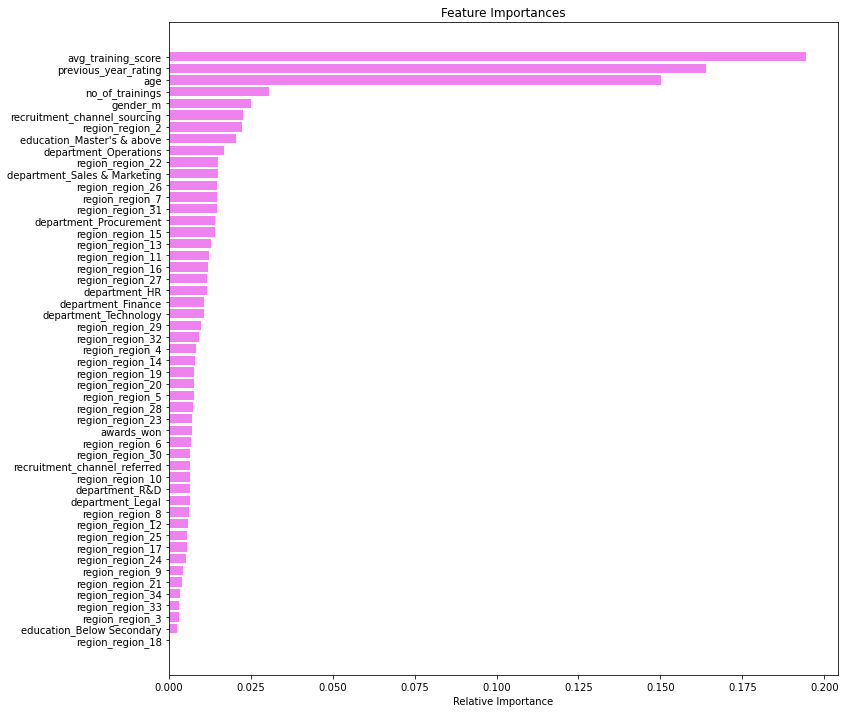

In [90]:
feature_names = X_train.columns
importances = tuned_rf2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Average trainign score is the most improtant feature of the model, followed by previous year rating, age, and length of service.

# Building final Model with pipelines

In [116]:
numerical_features = [
     'no_of_trainings', 'age',
       'previous_year_rating',
       'awards_won', 'avg_training_score']

numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])


# creating a list of categorical variables
categorical_features = ['region', 'education', 'gender',
       'recruitment_channel','department']

categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="drop",
)

In [117]:
# Separating target variable and other variables
X = data.drop(columns="is_promoted")
Y = data["is_promoted"]

In [126]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_promoted, dtype: int64

In [118]:
data.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,awards_won,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.000,0,49.000,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.000,0,60.000,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.000,0,50.000,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.000,0,50.000,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.000,0,73.000,0


In [119]:
data.shape

(54808, 11)

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  object 
 2   education             52399 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  int64  
 7   previous_year_rating  50684 non-null  float64
 8   awards_won            54808 non-null  int64  
 9   avg_training_score    52248 non-null  float64
 10  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 4.6+ MB


In [123]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(38365, 10) (16443, 10)


In [125]:
X_train.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,awards_won,avg_training_score
49671,Operations,region_26,Bachelor's,m,other,2,25,3.000,0,nan
41313,Analytics,region_2,Master's & above,m,sourcing,1,39,4.000,0,84.000
3725,Sales & Marketing,region_4,Bachelor's,f,other,1,33,1.000,0,47.000
11345,Operations,region_2,Master's & above,f,referred,1,35,5.000,0,nan
44181,Sales & Marketing,region_2,Bachelor's,f,other,1,33,1.000,0,50.000


In [121]:
sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

ValueError: could not convert string to float: 'Operations'

# Create the model with the best parameters

In [122]:
# Creating new pipeline with best parameters
model = Pipeline(
    steps=[
        ("pre", preprocessor),
        (
            "RF",
            RandomForestClassifier(
    class_weight={0: 0.18, 1: 0.82}, max_features='sqrt',
    n_estimators=80, oob_score=True, random_state=1
),
        ),
    ]
)
# Fit the model on training data
model.fit(X_train_over, y_train_over)

ValueError: A given column is not a column of the dataframe

# Some bug is causing the department column to be read as a numeric column and i cant figure out what it is, and i cant build the final model this way.

# Business Recommendations

The 3 biggest factors for being promoted are:
* Average Training Score: The higher an employee scores on their training exams, the more likely they are to be promoted.
* Previous year rating: The higher an employee was rated in the previous year, the more liekly they are to be promoted.
* Age: The older an employee is the more likely they are to be promoted.  This is highly correlated with Length of Service, which could also be used as a less effective method, but perhaps a more legal one.
* Being male is the 4th most important factor.  HR should take note of that and make sure promotions are being applied equitably.
